<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/AI_2025_pytorch_MLP_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# creaiamo un dataset "dummy"
import numpy as np
import matplotlib.pyplot as plt

# data - gaussian with different means
X = np.random.randn(2000,2)
X[0:1000,:] = X[0:1000,:] + 2
Y = np.zeros((2000,1))
Y[1000:2000] = 1

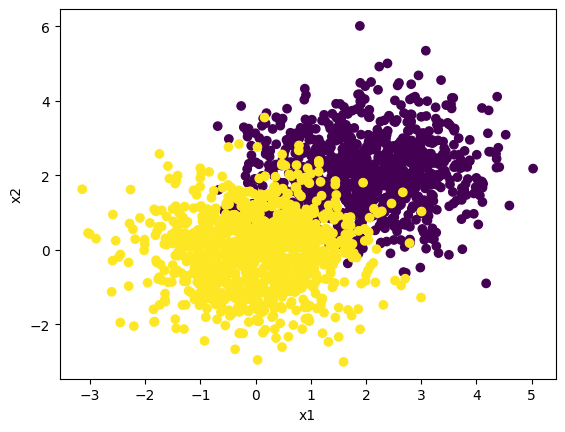

In [2]:
# Plot the dataset
plt.scatter(X[:,0],X[:,1],c=Y[:,0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [4]:
clf = LogisticRegression()# una classe che genera un "oggetto classificatore lineare" - pesi, la funzione per addestrare, la funzione di loss
clf.fit(X_train,Y_train)# funzione per "fittare i paramentri dati i dati"
score = clf.score(X_test,Y_test)# una funzione per calcolare accuracy
print(score)

0.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
def plot_decision_boundary(clf, X, Y):
  # plottiamo i punti e la superfice di separazione appresa dalla rete
  W = clf.W.clone().detach().numpy()
  b = clf.b.clone().detach().numpy()
  x1 = np.linspace(-5,5,100)
  x2 = -(W[0]*x1 + b)/W[1]
  plt.plot(x1,x2)
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.plot(x1,x2,"k--",label = "decision boundary")
  plt.legend()
  plt.show()
#plot_decision_boundary(clf, X, Y)

In [6]:
# adesso lo faccio "a mano" con pytorch
import torch
import torch.nn as nn
import torch.optim as optim

class customLogisticRegression(nn.Module):
  def __init__(self, input_size,lr=3e-2):
    super(customLogisticRegression,self).__init__()
    self.W = nn.Parameter(torch.randn(input_size,1)*0.01)# parametri del modello, pesi
    self.b = nn.Parameter(torch.randn(1))# fa parte dei parametri ma si chiama bias
    self.lr = lr# learning rate, ci serve dopo per scrive l'ottimizzatore
    # y = W*x + b funzione lineare
  def forward(self,x):
    output = x@self.W + self.b
    return torch.sigmoid(output)
  def fit(self, X_train,Y_train, epochs = 500):
    optimizer = optim.Adam(self.parameters(),lr=self.lr)
    criterion = nn.BCELoss()
    for epoch in range(epochs):
      y_pred = self.forward(X_train)# passo forward
      optimizer.zero_grad()# azzero i gradienti
      loss = criterion(y_pred,Y_train)
      loss.backward()# calcola i gradienti
      optimizer.step()# aggiorna i pesi
      if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
      if (((epoch+1) % 10 == 0) & (epoch < 50)):
        plot_decision_boundary(self, X_train.clone().detach().numpy(), Y_train.clone().detach().numpy())
  def score(self,X_test,Y_test):
    with torch.no_grad():
      y_pred = self.forward(X_test)
      y_pred = (y_pred > 0.5).float() # la soglia sulla probabilità, cioè passo da prob a classe assegnata
      accuracy = (y_pred == Y_test).float().mean().item()
    return accuracy


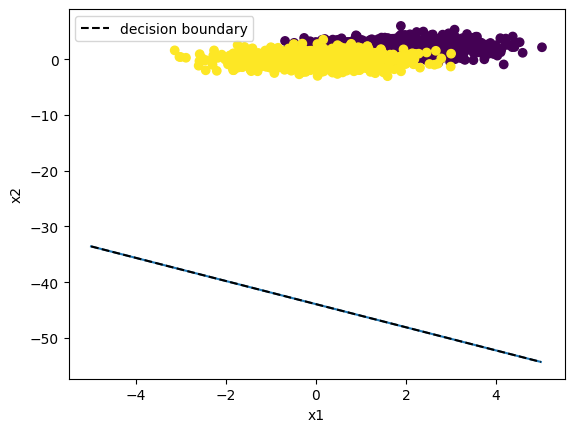

In [7]:
clf = customLogisticRegression(2,lr=3e-2)
plot_decision_boundary(clf, X, Y)

In [8]:
# converto a tensore pytorch
X_train = torch.tensor(X_train,dtype=torch.float32)
Y_train = torch.tensor(Y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
Y_test = torch.tensor(Y_test,dtype=torch.float32)

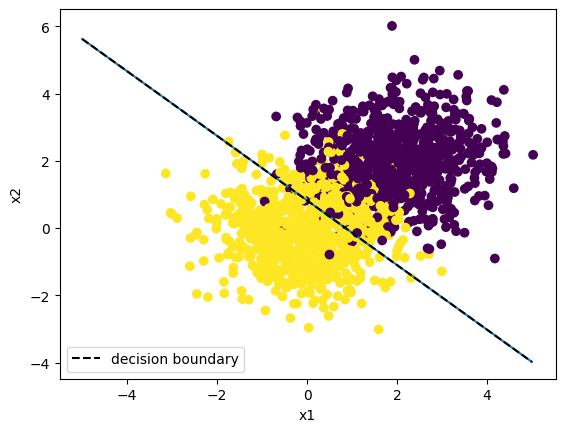

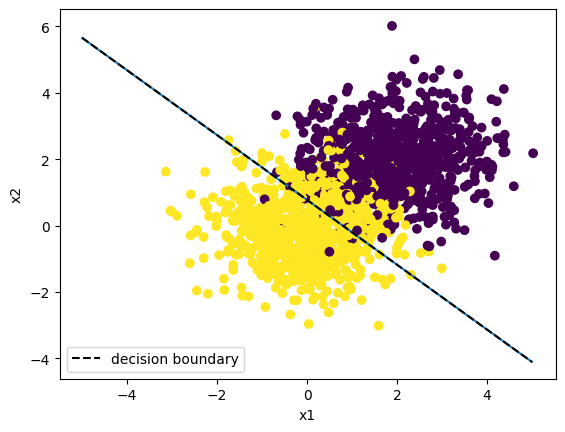

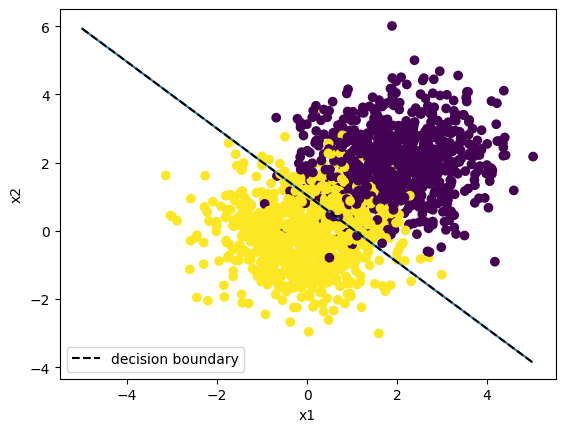

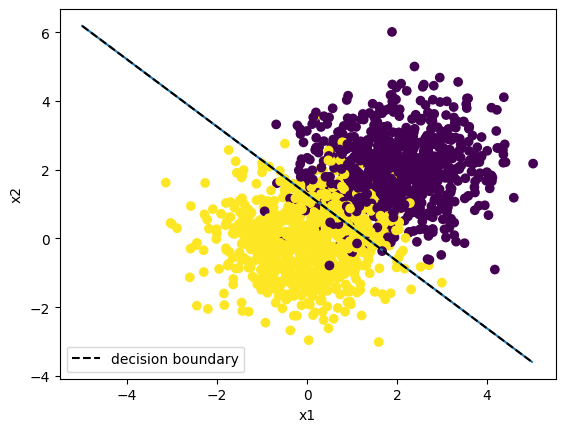

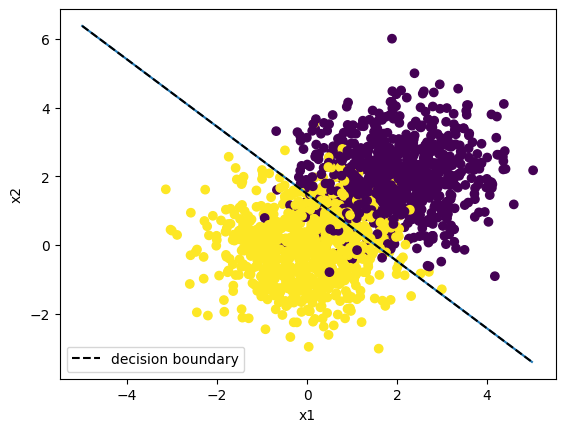

Epoch 100/1000, Loss: 0.2266
Epoch 200/1000, Loss: 0.2026
Epoch 300/1000, Loss: 0.1973
Epoch 400/1000, Loss: 0.1959
Epoch 500/1000, Loss: 0.1955
Epoch 600/1000, Loss: 0.1954
Epoch 700/1000, Loss: 0.1954
Epoch 800/1000, Loss: 0.1954
Epoch 900/1000, Loss: 0.1954
Epoch 1000/1000, Loss: 0.1954


In [9]:
clf.fit(X_train,Y_train,epochs=1000)

In [10]:
clf.score(X_test,Y_test)

0.9300000071525574

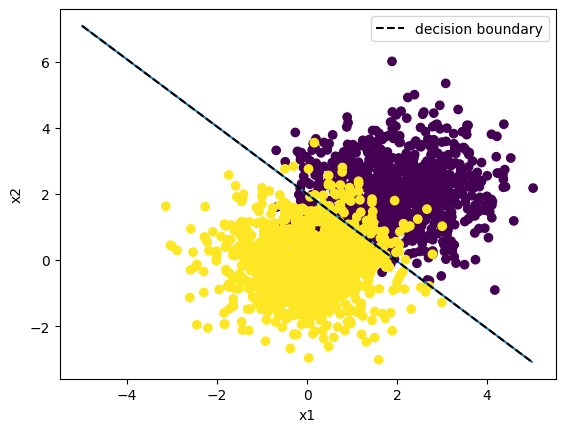

In [11]:
def plot_decision_boundary(clf, X, Y):
  # plottiamo i punti e la superfice di separazione appresa dalla rete
  W = clf.W.detach().numpy()
  b = clf.b.detach().numpy()
  x1 = np.linspace(-5,5,100)
  x2 = -(W[0]*x1 + b)/W[1]
  plt.plot(x1,x2)
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.plot(x1,x2,"k--",label = "decision boundary")
  plt.legend()
  plt.show()
plot_decision_boundary(clf, X, Y)